## Example 1: M level N qubit IQ classification

### M level one qubit case
We define the tunneling function for one qubit, i.e., for a new point $x = (I,Q)$, and old averaged caliberated point $x_n = (I_n,Q_n)$ correspoing to state $|\psi_n\rangle = |0\rangle,|1\rangle \cdots |M-1\rangle$, then we classify it as state $|\psi_a\rangle$ if $|x-x_a| = Min(|x-x_n|)$ 

```python
def get_meas(data0,q,Nq = level):
    #data[0][x]   qubits[x]   x == 0,1,2,3
    # if measure 1 then return 1
    Is = np.asarray(data0[0])
    Qs = np.asarray(data0[1])    
    sigs = Is + 1j*Qs

    total = len(Is)
    distance = np.zeros((total,Nq))
    for i in np.arange(Nq):
        center_i = q['center|'+str(i)+'>'][0] + 1j*q['center|'+str(i)+'>'][1]
        distance_i = np.abs(sigs - center_i)
        distance[:,i]=  distance_i

    tunnels = np.zeros((total,))
    for i in np.arange(total):
        distancei = distance[i]
        tunneli = np.int(np.where(distancei == np.min(distancei))[0])
        tunnels[i] = tunneli 
    return tunnels
```

### It acts like

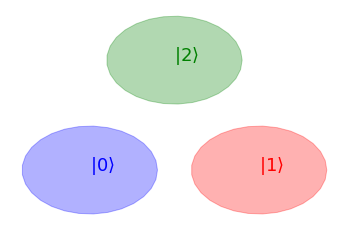

In [43]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
mids_i,mids_q = [0,2,1],[0,0,2]
ks,r = np.linspace(0,2,30)*np.pi,0.8
colors = ['b','r','g']
label = [r'$|0\rangle$',r'$|1\rangle$',r'$|2\rangle$']
for i in np.arange(3):
    plt.fill(r*np.cos(ks)+mids_i[i] , r*np.sin(ks)+mids_q[i]
             ,color=colors[i],alpha = 0.3)  
    plt.text(mids_i[i],mids_q[i],label[i],fontsize = 18,color = colors[i])
    plt.axis('off')
    




### M level N qubit case

```python
qNum = len(qubits)
# The length of raw data is counts_num
binary_count = np.zeros((counts_num),dtype = float)

for i in np.arange(qNum):
    ## define qNum - 1-i for the writing order : q1,q2,q3...
    binary_count += get_meas(data[0][i],qubits[qNum - 1-i]) * (level**i)
        
res_store = np.zeros((level**qNum))
for i in np.arange(level**qNum):
    res_store[i] = np.sum(binary_count == i) 

prob = res_store/counts_num


```

### raw Code for IQ classification

```python
def tunnelingNlevelQ_peach(qubits, data,level = 3,qNum = 1):
    ## generated to N qubit and multi level 20190618 -- ZiyuTao
    qNum = len(qubits)
    counts_num = len(np.asarray(data[0][0][0]))
    binary_count = np.zeros((counts_num),dtype = float)

    def get_meas(data0,q,Nq = level):
        #data[0][x]   qubits[x]   x == 0,1,2,3
        # if measure 1 then return 1
        Is = np.asarray(data0[0])
        Qs = np.asarray(data0[1])    
        sigs = Is + 1j*Qs
        
        total = len(Is)
        distance = np.zeros((total,Nq))
        for i in np.arange(Nq):
            center_i = q['center|'+str(i)+'>'][0] + 1j*q['center|'+str(i)+'>'][1]
            distance_i = np.abs(sigs - center_i)
            distance[:,i]=  distance_i
        
        tunnels = np.zeros((total,))
        for i in np.arange(total):
            distancei = distance[i]
            tunneli = np.int(np.where(distancei == np.min(distancei))[0])
            tunnels[i] = tunneli 
        return tunnels

    for i in np.arange(qNum):
        binary_count += get_meas(data[0][i],qubits[i]) * (level**i)
        

    res_store = np.zeros((level**qNum))
    for i in np.arange(level**qNum):
        res_store[i] = np.sum(binary_count == i) 
        
    prob = res_store/counts_num
    return prob

```

## Example 2: N qubit state tomography

We need $3^N$ operations $\{I,X_{\pi/2},Y_{\pi/2}\}^{\otimes N}$ which generally acting on N qubits $(q_1,q_2,q_3 \cdots)$, so we need two loops.

```python
#!/usr/bin/env python3
for tomo_idx in range(3**N):
    for q_idx in range(N):
        q_tomo = qlist[N-1-q_idx]
        gate_idx = (tomo_idx//(3**(q_idx+1)))%(3**(q_idx)
        q_tomo.add_gate(gates[gate_idx])
```

### Mathtips: 
it transforms tomo_idx into **3-digit** where the n-th digit represents an operation, e.g. "0212" correspond 
    to the operations $I \otimes Y/2 \otimes X/2 \otimes Y/2$.

### Others: 
- qlist[N-1-q_idx] is set as we prefer denote qlist as (q1,q2,q3) and the digit system is from right to left.

- the quantum operation usually definied by a two-tuple, ($\theta$,$\phi$), so we can define as following

```python
thetas = [0,np.pi/2,np.pi/2]
phis = [0,0,np.pi/2]
## gate_idx == 0,1,2
gate_tomo = get_gate(thetas[gate_idx],phis[gate_idx])
```